In [1]:
from sklearn.manifold import Isomap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
large = pic = mpimg.imread('./Datasets/Adam/digi_0299cs.jpg')

In [3]:
large.shape

(1400, 853, 3)

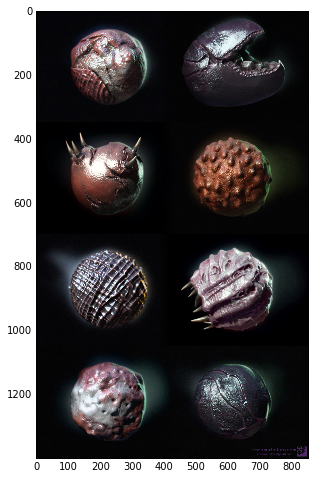

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(large)

In [5]:
strip = np.split(large, 4, axis=0)

In [6]:
type(strip)

list

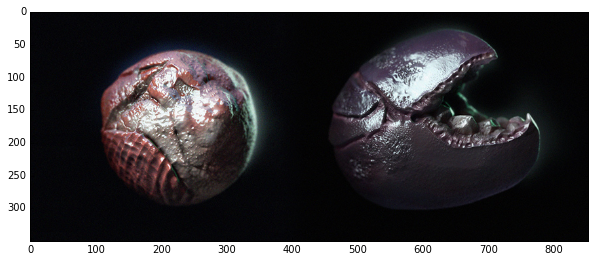

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(strip[0])

In [8]:
strip[0].shape

(350, 853, 3)

In [9]:
width = strip[0].shape[1]/2
width

426

In [10]:
im2 = strip[0][:,426:852,:]
im2.shape

(350, 426, 3)

In [11]:
spooky = list()

In [12]:
for a in strip:
    spooky.append(a[:,:width,:])
    spooky.append(a[:,width:2*width,:])


In [13]:
len(spooky)

8

In [14]:
for img in spooky:
    print img.shape

(350, 426, 3)
(350, 426, 3)
(350, 426, 3)
(350, 426, 3)
(350, 426, 3)
(350, 426, 3)
(350, 426, 3)
(350, 426, 3)


In [15]:
spooky[0][100,200,:]

array([161, 118, 138], dtype=uint8)

### Convert to Grayscale

Use standard  `L = R * 299/1000 + G * 587/1000 + B * 114/1000`

In [16]:
def greyscale(rgb):
    """
    :param: rgb: A vector of 3 bytes of RGB color
    
    Returns luminance
    """
    return rgb[0]*299./1000. + rgb[1]*587./1000. + rgb[2]*114./1000.

In [17]:
spooky_gs = []
for img in spooky:
    spooky_gs.append(np.apply_along_axis(greyscale, 2, img))


In [18]:
spooky_gs[0][0,0]

4.7119999999999997

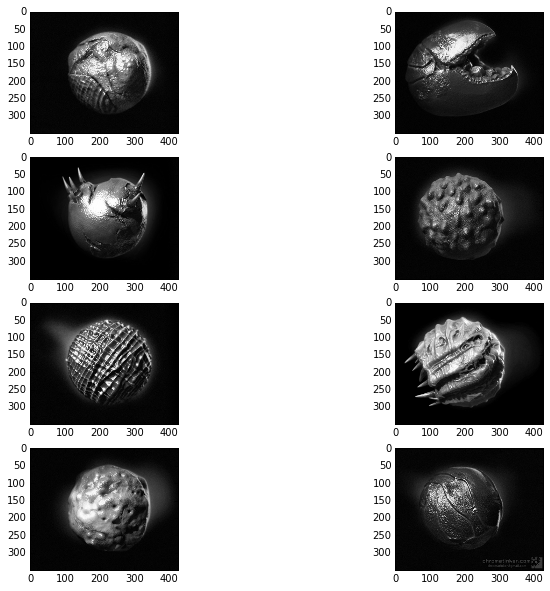

In [19]:
fig = plt.figure(figsize=(12,10))
for i in range(0,8):
    ax = fig.add_subplot(4,2,i+1)
    ax.imshow(spooky_gs[i], cmap=plt.cm.gray)


## Now convert to vectors

In [20]:
spooky_vectors = []
for img in spooky_gs:
    spooky_vectors.append(img.flatten())

In [21]:
## And save as a dataframe for plotting
spooky_df = pd.DataFrame(spooky_vectors)

In [22]:
spooky_df.shape

(8, 149100)

In [23]:
spooky_df[0]

0    4.712
1    2.000
2    1.000
3    7.000
4    6.000
5    0.587
6    3.000
7    4.929
Name: 0, dtype: float64

In [24]:
pic_width = spooky_gs[0].shape[0]
print pic_width
pic_height = spooky_gs[0].shape[1]
print pic_height

350
426


In [25]:
def Plot2D(df, T, title, x, y, pic_width, pic_height, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    scale_factor = 0.75
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    print ("OK so far")
    num_to_plot = min(T.shape[0], num_to_plot)
    print "num_to_plot = {}".format(num_to_plot)
    for img_num in range(num_to_plot):
        # x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        # x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        x0, y0 = T[img_num,x]-scale_factor*x_size, T[img_num,y]-scale_factor*y_size
        x1, y1 = T[img_num,x]+scale_factor*x_size, T[img_num,y]+scale_factor*y_size        
        img = df.iloc[img_num,:].reshape(pic_width, pic_height)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

### Perform Isomap

In [32]:
iso = Isomap(n_components=5)
iso.fit(spooky_df)
T = iso.transform(spooky_df)

OK so far
num_to_plot = 8


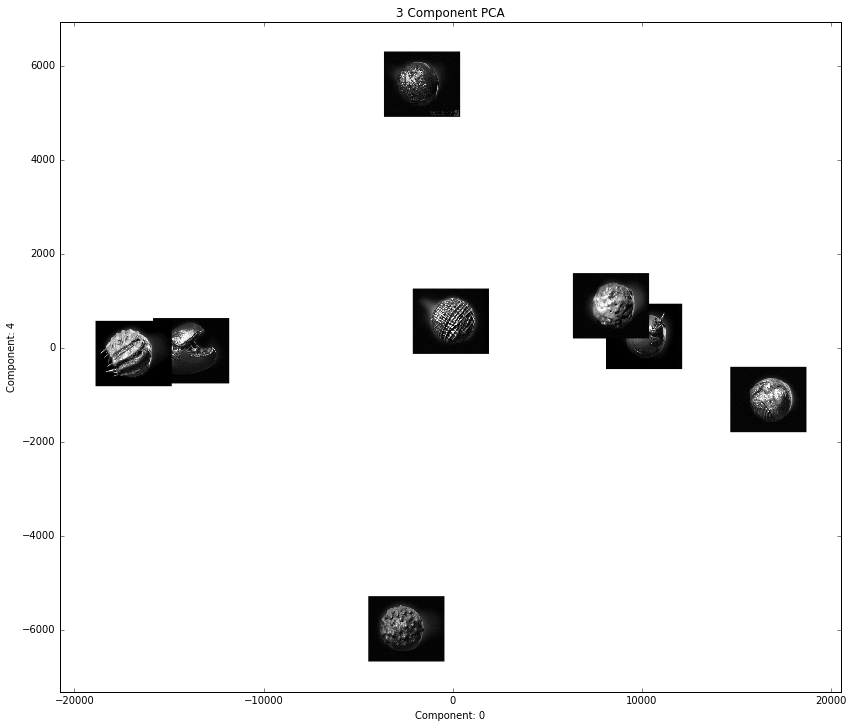

In [33]:
Plot2D(spooky_df, T, "3 Component PCA", 0,4, pic_width, pic_height)
F = plt.gcf()
F.set_size_inches(14,12)
plt.show()